In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os


In [2]:
if os.path.exists("data.csv"):
    data = pd.read_csv("data.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [3]:
data

,Close,Open,High,Low,Vol.,Change
Date,,,,,,
03-01-2005,2115.00,2080.00,2118.60,2080.00,70.51,1.66
04-01-2005,2103.75,2116.95,2120.15,2100.55,72.72,-0.53
05-01-2005,2032.20,2103.75,2105.10,1990.15,109.22,-3.40
06-01-2005,1998.35,2031.55,2035.65,1984.25,94.32,-1.67
07-01-2005,2015.50,1998.25,2021.45,1992.55,76.29,0.86
...,...,...,...,...,...,...
27-11-2024,24274.90,24204.80,24354.55,24145.65,295.01,0.33
28-11-2024,23914.15,24274.15,24345.75,23873.35,366.75,-1.49
29-11-2024,24131.10,23927.15,24188.45,23927.15,282.10,0.91


In [4]:
ma_100_days = data.Close.rolling(100).mean()

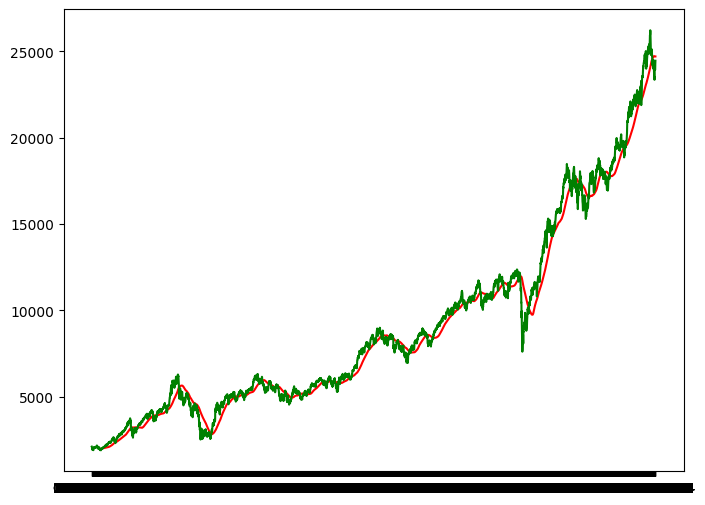

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

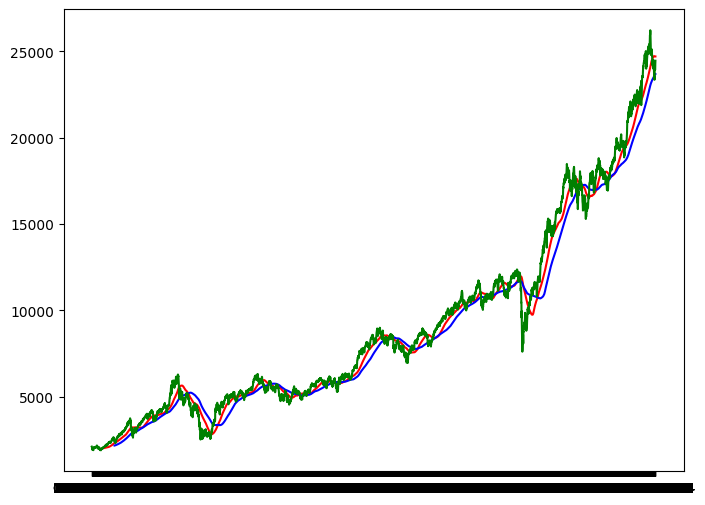

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [10]:
data_train.shape[0]

3933

In [11]:
data_test.shape[0]

984

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

ImportError: Traceback (most recent call last):
  File "c:\Users\pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
model= Sequential()
model.add(LSTM(units=50, acyivation =' relu',return_sequence=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequence=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

In [ ]:
model.summary()

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')